In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot') # prevent border around the plot

In [2]:
import dataframe_image as dfi
import os

In [3]:
from IPython.display import display
p = print
d = display
def val(x):
  if (isinstance(x, (int, np.integer)) or isinstance(x, (float, np.float))) and not isinstance(x, (bool, np.bool)):
    return x
  try:
    return int(x) if not x is None else 0
  except ValueError:
    try:
      return float(x)
    except ValueError:
      return 0

In [4]:
val(None)

0

In [5]:
def disp_to_file(df_, path):
  df = df_.replace(0, ' ')
  with open(path, "w") as f:
    df_styled = df.style
    dfi.export(df_styled, path)

  os.startfile(path, "print")

# Get the Hashi Table

In [6]:
DEBUG = False
fname = 'hashi'
png_fname = fname
df_sol = None
for i in range(7, 8):
  f_name = f'{fname}{i}.xlsx'
  try:
    hashi = pd.read_excel(f_name, header=None)
  except:
    f_name = f'{fname}{i}.csv'
    hashi = pd.read_csv(f_name, header=None)
  png_fname = f_name
  p(f_name)
  hashi.fillna(0, inplace=True)
  hashi = hashi.apply(pd.to_numeric, downcast='integer')
  rows = len(hashi)
  cols = len(hashi.columns)

  h_org = hashi.copy()

  #disp_to_file(hashi, f_name + '.png')

  #solve_hashi()


hashi7.csv


In [7]:
def manual_hashi():
  global hashi
  hashi[0] = [1,0,4,0,2,0]
  hashi[1] = [0,0,0,2,0,3]
  hashi[2] = [4,0,7,0,1,0]
  hashi[3] = [0,0,0,2,0,5]
  hashi[4] = [0,0,3,0,1,0]
  hashi[5] = [3,0,0,3,0,3]

  hashi = pd.DataFrame(hashi).T
  rows = len(hash)
  cols = len(hash.columns)

  h_org = hashi.copy()

  d(hashi)
#manual_hashi()

>### Modify Hashi

In [8]:
#hashi.iloc[4,2]='-'
#hashi.iloc[5,3]=2
#df = hashi
#d(df)
#df_sol
#disp_to_file(df_sol, f_name + '_solution.png')

In [9]:
nodes = {}
roads = {}
def make_nodes(hashi):
  n = -1
  for i in range(rows):
    node = None
    for j in range(cols):
      n += 1
      nodes[n] = (i,j)
      nodes[(i,j)] = n
      if hashi.iloc[i,j] == 0:
        continue
      if node is None:
        node = n
        node_val = hashi.iloc[i,j]
        continue
      if not (node_val == 1 and hashi.iloc[i,j] == 1):
        min_ = 2
        if (node_val == 2 and hashi.iloc[i,j] == 2):
          min_ = 1
        roads[node, n] = min(node_val, min(min_, hashi.iloc[i,j]))
      node = n
      node_val = hashi.iloc[i,j]
  # now the columns connections
  for j in range(cols):
    node = None
    for i in range(rows):
      n = i * cols + j
      if hashi.iloc[i,j] == 0:
        continue
      if node is None:
        node = n
        node_val = hashi.iloc[i,j]
        continue
      if not (node_val == 1 and hashi.iloc[i,j] == 1):
        min_ = 2
        if (node_val == 2 and hashi.iloc[i,j] == 2):
          min_ = 1
        roads[node, n] = min(node_val, min(min_, hashi.iloc[i,j]))
      node = n
      node_val = hashi.iloc[i,j]
  if DEBUG:
    p('Nodes:', nodes)
    p('\nRoads:\n')
    p(roads)
#make_nodes(hashi)  

In [37]:
from copy import deepcopy

links_org = None
def make_links():
  links = {}
  for x, y in roads.keys():
      if x in links:
          links[x].append(y)
      else:
          links[x] = [y]
      if y in links:
          links[y].append(x)
      else:
          links[y] = [x]
  if DEBUG: p(links)
  links_org = deepcopy(links)
  return links, links_org

## Plot

In [36]:
def plot_table(df):
  if DEBUG: p('in plot_table')
  fig, ax = plt.subplots(dpi=144)
  ax.set_facecolor('w')  # white background
    # remover borders
#  ax.spines["top"].set_visible(False)
#  ax.spines["right"].set_visible(False)
#  ax.spines["left"].set_visible(False)
#  ax.spines["bottom"].set_visible(False)
  df = df.T
  rows = len(df)
  cols = len(df.columns)
  plt.xlim(-1, rows)
  plt.ylim(cols, -1)

  for i in range(rows):
    for j in range(cols):
      if val(df.iloc[i,j]) == 0:
        continue
      
      ax.text(i, j, df.iloc[i, j], 
         ha="center", va="center",
         bbox=dict(boxstyle="circle", facecolor='white', alpha=1, edgecolor='black')
         ) 

  png_path = png_fname + '_table_plot.png'
  plt.savefig(png_path)
  plt.show()

  os.startfile(png_path, "print")  
#plot_table(hashi) 

In [12]:
import matplotlib.transforms as transforms
def plot_trip(l):
  l_ = {}
  if DEBUG: p('in plot_trip', len(l.keys()), l)
  fig, ax = plt.subplots(dpi=144)
  ax.set_facecolor('w')
  plt.xlim(-1, rows)
  plt.ylim(cols, -1)

  for tup, n_conn in l.items():
    new_tup = (tup[1], tup[0])
    if new_tup in l_:  # skip duplicates
      continue
    l_[new_tup] = 0
    p1 = nodes[tup[0]]
    p2 = nodes[tup[1]]
    df = pd.DataFrame([p1, p2], index=['p1', 'p2'])
    line, = ax.plot(df[1], df[0], lw=1, color='black')#, lw= 2 * (lw * 2 - 1))

    ax.text(p1[1], p1[0], hashi.iloc[p1[0], p1[1]], 
         ha="center", va="center",
         bbox=dict(boxstyle="circle", facecolor='white', alpha=1, edgecolor='black')
         ) 
    
    if n_conn == 1:
      continue
    # shift the lines over 2 points
    # from site: https://matplotlib.org/2.0.2/users/transforms_tutorial.html
    dx = df[1][0] - df[1][1]
    dy = df[0][0] - df[0][1]
    if dx != 0:
      dy = 2/72
      dx = 0
    else:
      dy = 0
      dx = 2/72
    offset = transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    shadow_transform = ax.transData + offset

      # now plot the same data with our offset transform;
      # use the zorder to make sure we are below the line
    ax.plot(df[1], df[0], lw=1, color='black', transform=shadow_transform,  zorder=0.5*line.get_zorder())

  png_path = fname + '_plot.png'
  plt.savefig(png_path)
  plt.show()

  os.startfile(png_path, "print")  
#plot_trip(l)  

# DO the trip

In [13]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
class Stack:
    def __init__(self):
        self.head = None
 
    def push(self, data):
        if DEBUG: p('push', data)
        if self.head is None:
            self.head = Node(data)
        else:
            new_node = Node(data)
            new_node.next = self.head
            self.head = new_node
 
    def pop(self):
        if self.head is None:
            return None
        else:
            popped = self.head.data
            tmp = self.head.next
            del self.head
            self.head = tmp
            if DEBUG: p('pop', popped)
            return popped

In [14]:
queue = Stack()

def find_city(h):
       # try a city in the list which has connections left
    if DEBUG: p('in find city')
    for i in range(rows * cols):
      if val(h.iloc[nodes[i]]) > 0:
        if DEBUG: p('found city', i)
        return i
      
def is_road_blocked(h, tup, block=['-', '/', 'X']):
    node1, node2 = nodes[tup[0]], nodes[tup[1]]
    rows=[node1[0], node2[0]]
    cols=[node1[1], node2[1]]
    if rows[0] > rows[1]:
      rows[0], rows[1] = rows[1], rows[0]
    if cols[0] > cols[1]:
      cols[0], cols[1] = cols[1], cols[0]
    for r in range(rows[0], rows[1] + 1):
      for c in range(cols[0], cols[1] + 1):
#        if (tup[0] == 60 or tup[1] == 60): p('in is_road_blocked', tup, node1, node2, rows, cols, block, r, c, h.iloc[r, c])
        if h.iloc[r, c] in block:
          return True
    return False
        
def get_next_city(start, l, h, round):
  if DEBUG: p("start", start, links[start], l, h.iloc[nodes[start]], 'round=', round)
  if DEBUG: d(h)
  for city in links[start]:
    if DEBUG: p('new city', city, l)
      # allow multiple times to connect between cities as long as it is not more than 2 connections
      # check if the connection between these 2 cities is already taken care of
    tup2 = (city, start)
    if tup2 in l:
      if DEBUG: p('check',l[tup2], city, start)
      if round == 0 or l[tup2] > 1:
        continue
    tup = (start, city)
    if tup in l:
      if DEBUG: p('check 2',l[tup], city, start)
      if round == 0 or l[tup] > 1:
        continue
      # check if city has connections left
    if DEBUG: p('remain', start, h.iloc[nodes[start]])
    if h.iloc[nodes[start]] == 0:
      continue  # end of chain, try another city
    if DEBUG: p('remain2', city, h.iloc[nodes[city]])
    if h.iloc[nodes[city]] == 0:
      continue  # can not use this city because no connection left, try another city
      # check if there is no block in the middle
    if is_road_blocked(h,tup):
      if DEBUG: p('blocked')
      continue
    if not tup in l: 
      l[tup] = 0
    if not tup2 in l: 
      l[tup2] = 0
#    n_conn = roads[(start, city)] if (start, city) in roads else roads[(city, start)]
#    l[start][1] = min(h.iloc[nodes[start]], n_conn)  # number of connections
    n_conn = 1
    l[tup] += n_conn
    l[tup2] += n_conn
    if l[tup] != l[tup2]:
      if DEBUG: p('ERROR: ', tup, tup2, l[tup], l[tup2])
      raise Exception
#    n_conn = l[start][1]
    h.iloc[nodes[start]] -= n_conn # connections left for the cities
    h.iloc[nodes[city]] -= n_conn # connections left for the cities
    if DEBUG: p("city", city, l)
    if DEBUG: d(h)
    return city
  if DEBUG: p('none')
  if round == 1:
    return find_city(h)
  return None  # end of chain, go back and find a prev city with connections not 0

l = {}

def trip():
  global h_fix
  def get_last():
    if DEBUG: p('in get_last')
    data = queue.pop()
    if data is None:  #queue is empty
      return None
    start = data
    lasts.pop()
    if DEBUG: p(start)
    return start
  
  def init(start):
    if DEBUG: d(h_fix)
    h = h_fix.copy()
    round = 0
    l = l_fix.copy()
    while queue.pop():
      pass
    if start is None:
      lasts = []
    else:
      lasts = [start]
      queue.push(start)
    return l, h, round, lasts
    
  n = rows * cols
  start = None
  if len(links.keys()) > 0:
    start = list(links.keys())[0]
  l, h, round, lasts = init(start)
  while sum_table(h) > 0:
    if DEBUG: p("lasts", start, round, lasts)
    city = get_next_city(start, l, h, round)
    if not city is None:
      if city == start:
          # no solution so remove the first link  and try another solution
        start = list(links.keys())[0]
        links[start].pop(0)
        if DEBUG: p("start again: ", start, links[start])
        while get_last() is None:
          pass 
        l, h, round, lasts = init(start)
        continue
        # is the new city has any connections left
      if val(h.iloc[nodes[city]]) > 0:
        start = city
        queue.push(start)
        lasts.append(start)
        continue
      start = get_last()
      if start is None:
        start = find_city(h)
      continue
    start = get_last()
    if start == None:
      if round > 0:
        break
      round += 1
      start = list(links.keys())[0]
  p('finished: ', sum_table(h))
  return l

In [15]:
l_fix = None
h_fix = None

def make_l(l, n1, n2, n_conn):
  if n_conn == 0:
    return
  tup = (n1, n2)
  tup2 = (n2, n1)
  if not tup in l: 
    l[tup] = 0
  if not tup2 in l: 
    l[tup2] = 0
  l[tup] += n_conn
  l[tup2] += n_conn
  
  rows=[-1,-1]
  cols=[-1,-1]
  for i in [0, 1]:
    node = nodes[tup[i]]
    rows[i] = node[0]
    cols[i] = node[1]
  block = '-'
  if rows[0] == rows[1]:
    dir = 'right'
    if cols[0] > cols[1]:
      cols[0], cols[1] = cols[1], cols[0]
      dir = 'left'
    rows[1] += 1
    cols[0] += 1
  elif cols[0] == cols[1]:
    dir = 'down'
    if rows[0] > rows[1]:
      rows[0], rows[1] = rows[1], rows[0]
      dir = 'up'
    cols[1] += 1
    rows[0] += 1
    block = '/'
  for r in range(rows[0], rows[1]):
    for c in range(cols[0], cols[1]):
      h_fix.iloc[r, c] = block
  return dir

## find 3 or 4 with 2 connections only (usually in a corner)

In [55]:
def update_link(i, j, node, n_c, lk, reason):
  global df_sol

  if not n_c is None:
    tup_lk = nodes[lk]
    n_c = min(n_c, h_fix.iloc[tup_lk])
    if n_c <= 0:
      return
    h_fix.iloc[tup_lk] -= n_c
    h_fix.iloc[i,j] -= n_c
  
  new = pd.Series([nodes[node], hashi.iloc[i,j], h_fix.iloc[i,j], n_c, 'remove', h_fix.iloc[i,j], reason], index = df_sol.columns)
  if not n_c is None:
    new.dir = make_l(l_fix, node, lk, n_c)
    new.new_val = h_fix.iloc[i,j]
  df_sol = df_sol.append(new, ignore_index=True)
  
  if n_c is None:
    return
    # added 30.03.2021 ( node of 5, connect to node of 3 that was comleted to 2 connections -> node left with 0 (when 3_or_4 was processed, and next the 5_6 was processed and though the node is still on the liks and exception' so now we remocve each node left with 0 and not waitin for the zero cycle))
  if h_fix.iloc[i,j] == 0:
    links[lk].remove(node)
    if len(links[lk]) == 0:
      del links[lk]
    if (node in links):# and len(links[node]) >: changed on 31.03.2021
      del links[node]
      
def update_2links(i, j, node, n_conn, link, reason):
  found2 = False
  for lk in link:
    tup = (node, lk)
    n_c = n_conn
      # check if not already in l_fix
    if tup in l_fix: 
      n_c -= l_fix[tup]
    update_link(i, j, node, n_c, lk, reason)
      # special case - a city with 1, then the other connections (if the node is 5 or 3 must be 2 connections)
    tup_lk = nodes[lk]
    if n_conn == 1 and h_fix.iloc[tup_lk] == 0:
      found2 = True
    elif l_fix[tup] == 2: # if connections = 2 remove the link from the list
      if node in links[lk]:
        links[lk].remove(node)
        if len(links[lk]) == 0:
          del links[lk]
        p('after update_link 0')
  if (node in links) and h_fix.iloc[i,j] == 0:
      del links[node]
  if found2:
    for lk in link:
      tup_lk = nodes[lk]
      if h_fix.iloc[tup_lk] > 0:
        update_link(i, j, node, 1, lk, reason)              
              # if connections = 2 remove the link from the list
        if node in links[lk]:
          p('after update_link 1')
          links[lk].remove(node)
          if len(links[lk]) == 0:
            del links[lk]
      if (node in links):# and len(links[node]): changed on 31.03.2021
        del links[node]

In [40]:
def process_3_or_4(found, i, j, round, subtitle=''):
  if val(h_fix.iloc[i, j]) <= 0:
    return found
  node = nodes[(i,j)]
  global DEBUG
  #DBG = True if node == 114 else False
  link = links_org[node] if round == 0 else links[node]
  if len(link) > 2:
    return found
  do_update = True
  reason = f'corner {hashi.iloc[i, j]}'
  sav_h =  h_fix.iloc[i,j]
  if round > 0 and len(links_org[node]) > 2:
    #if node == 137: p(i, j, node, l_fix, '\n', links_org[node], link)
      # ignore node (3 or 4) that is already connected by 2 connections to another node 
      # and that is why it is down to 2 nodes left and not due to a block (not really a true corner)
    for lk in links_org[node]:
        tup = (node, lk)
        #if DEBUG or DBG: p('\t', tup, tup in l_fix)
        if tup in l_fix and l_fix[tup] == 2:
          #if DEBUG or DBG: p('\t\t', tup, l_fix[tup])
          return found
      # if node is left with 2 links only and has less than 3 connections left it does not qualify as a corner
    if len(link) == 2 and h_fix.iloc[i, j] < 2:
      return found
      # a case where it is not a corner case is when has 2 links, 2 connections left and no link yet between the 2 connections
      # unless one of the links has 1 connection left so we need to connect the current node to the other link with 1 connection at least
    if len(link) == 2 and h_fix.iloc[i, j] == 2:
      found2 = False
      for lk in link:
        tup = (node, lk)
        tup_lk = nodes[lk]
        if tup in l_fix:
          found2 = True
          break
        if h_fix.iloc[tup_lk] == 1: #add a connection to the other node
          lk = link[1] if lk == link[0] else link[0]
          update_link(i, j, node, 1, lk, reason)
          found = found2 = True
          do_update = False
          break
      if not found2:
        return found
  n_conn = 1 if hashi.iloc[i, j] == 3 or h_fix.iloc[i, j] < 3 else 2  # was < 4, change to < 3 for hashi5
  if n_conn == 2 and h_fix.iloc[i, j] == 3 and hashi.iloc[i, j] == 4:
    for lk in link:
      tup = (node, lk)
      tup_lk = nodes[lk]
      found2 = False
      if tup in l_fix: # found a connection with one of the nodes so it will have no more tan 1 extra connection and the total will not exceed 3
        found2 = True
        break
    if not found2:
      n_conn = 1
        
  if do_update:
    update_2links(i, j, node, n_conn, links[node], reason)
  if sav_h != h_fix.iloc[i,j]:
    found = True
    tup0 = nodes[int(link[0])] 
    tup1 = nodes[int(link[1])]
    if DEBUG or DBG: p('found_3_or_4' + subtitle + ': ', i, j, node, link, tup0, tup1, sav_h, h_fix.iloc[i,j])
  return found

In [18]:
def find_3_or_4(round=0):
  if round == 0:
    find_7_or_8()
  found = False
  if DEBUG: p()
  sub_title = '' if round == 0 else f'_r{round}'
  for i in range(rows):
    for j in range(cols):
      if hashi.iloc[i, j] == 3 or hashi.iloc[i, j] == 4:
          found = process_3_or_4(found, i, j, round, sub_title)
  if DEBUG:
    if found:
      d(h_fix)
      p(l_fix)
      p()
      p('links:', links)
    else:
      p('Not found_3_or_4' + sub_title)

## find 5 or 6 on the side

In [39]:
def process_5_or_6(found, i, j, round, subtitle=''):
  if val(h_fix.iloc[i, j]) <= 0:
    return found
  node = nodes[(i,j)]
  DBG = True if node == 54 else False
  link = links_org[node] if round == 0 else links[node]
  if len(link) > 3:
    return found
  do_update = True       
  sav_h =  h_fix.iloc[i,j]
  reason = f'side {hashi.iloc[i, j]}'
  if round > 0 and len(links_org[node]) > 3:
    if len(link) == 3 and h_fix.iloc[i, j] <= 2:
      return found
#          if DEBUG or DBG: p(i, j, node, h_fix.iloc[i, j], links_org[node], link, l_fix, '\n')
      # if node is left with 2 links only and has more than 2 connections left need to connect 1 for each node (same as 3 in a corner)
    if len(link) == 2 and h_fix.iloc[i, j] <= 2:
      # ignore node (5 or 6) that is already connected by 2 connections to another node 
      # and that is why it is down to 2 nodes left and not due to a block (not really a true corner)
      # unless one of the links has 1 connection left so we need to connect the current node to the other link with 1 connection at least
      if len(link) == 2 and h_fix.iloc[i, j] == 2:  
#            found2 = False
        #if DEBUG or DBG: p(i, j, node, h_fix.iloc[i, j], links_org[node], link, '\n', l_fix)
          # our node has 2 connections left, and we have 2 nodes in the link
          # so we must connect to both with 2, and if we already are connected to both of them, need to complete to 2 connections
        count = 0
        for lk in link:
          tup = (node, lk)
          tup_lk = nodes[lk]
          if h_fix.iloc[tup_lk] == 1: #add a connection to the other node
            lk = link[1] if lk == link[0] else link[0]
            update_link(i, j, node, 1, lk, reason)
            if DEBUG or DBG: p(i, j, node, link, '\n', l_fix)
            found = found2 = True
            do_update = False
            break
          if tup in l_fix:
            count += 1
        if count == 2: # need to completet both links to 2 connections
          found = found2 = True
          do_update = False
          update_2links(i, j, node, 2, link, reason)
      else:
        for lk in links_org[node]:
          tup = (node, lk)
          if DEBUG or DBG: p('\t', tup, tup in l_fix)
          if tup in l_fix and l_fix[tup] == 2:
            if DEBUG or DBG: p('\t\t', tup, l_fix[tup])
            return found
  n_conn = 1 if hashi.iloc[i, j] == 5 else 2
  if n_conn == 2 and h_fix.iloc[i, j] == 4 and len(link) == 3:  # added 30.03.2021 (hashi7)
    n_conn = 1
  if do_update:
    update_2links(i, j, node, n_conn, links[node], reason)
  if sav_h !=  h_fix.iloc[i,j]:
    found = True
    tup0 = nodes[int(link[0])] 
    tup1 = nodes[int(link[1])]
    tup2 = nodes[int(link[2])] if len(link) > 2 else None
    if DEBUG: p('found_5_or_6' + subtitle + ': ', i, j, node, link, tup0, tup1, tup2, sav_h, h_fix.iloc[i,j])
  return found

In [20]:
def find_5_or_6(round=0):
  find_3_or_4(round)
  if DEBUG: p()
  found = False
  
  sub_title = '' if round == 0 else f'_r{round}'
  for i in range(rows):
    for j in range(cols):
      if hashi.iloc[i, j] == 5 or hashi.iloc[i, j] == 6:
          found = process_5_or_6(found, i, j, round, sub_title)
          
  if DEBUG:
    if found:
      d(h_fix)
      p(l_fix)
      p()
      p('links:', links)
    else:
      p('Not found_5_or_6' + sub_title)

## find 7 or 8 in the middle

In [38]:
def find_7_or_8():
  if DEBUG: p()  
  found = False
  for i in range(1, rows-1):
    for j in range(1, cols-1):
      if hashi.iloc[i, j] >= 7:
        found = True
        node = nodes[(i,j)]
        link = links_org[node]
        tup0 = nodes[int(link[0])] 
        tup1 = nodes[int(link[1])] 
        tup2 = nodes[int(link[2])] 
        tup3 = nodes[int(link[3])] 
        if DEBUG: p('found_7_or_8:', i, j, node, link, tup0, tup1, tup2, tup3)
        n_conn = 1 if hashi.iloc[i, j] == 7 else 2
          # check if not already in l_fix
        found2 = False
        reason = f'inside {hashi.iloc[i, j]}'
        for lk in link:
          tup = (node, lk)
          n_c = n_conn
          if tup in l_fix: 
            n_c -= l_fix[tup]
          update_link(i, j, node, n_c, lk, reason)            
            # special case - 7 connected to a city with 1, then the other 2 must be 2 connections
          tup_lk = nodes[lk]
          if n_conn == 1 and h_fix.iloc[tup_lk] == 0:
            found2 = True
        if found2:
          for lk in link:
            tup = (node, lk)
            tup_lk = nodes[lk]
            if h_fix.iloc[tup_lk] > 0:
              update_link(i, j, node, 1, lk, reason)              
                    # if connections = 2 remove the link from the list
              if node in links[lk]:
                p('after update_link 7_8')
                links[lk].remove(node)
                if len(links[lk]) == 0:
                  del links[lk]
          if node in links:
            del links[node]
  if DEBUG: 
    if found:
      d(h_fix)
      p(l_fix)
      p()
      p('links:', links)
    else:
      p('\nNot found_7_or_8\n')

## Special cases: 4 
>with 3 neighbours, one of them (or 2) with 1 connection, or with 2 neighbours (both must be 2 connections) or 3 neighbours 2 of them nodes of 2 (must have a connection to the 3rd otherwise an island)

In [41]:
def process_special4(found, h, i, j, round, subtitle=''):
  if val(h_fix.iloc[i, j]) <= 0:
    return found
  node = nodes[(i,j)]
  link = links_org[node]
  sav_h = h_fix.iloc[i,j]
  dbg_key = None
  reason = f'special {hashi.iloc[i, j]}'
  if len(link) == 3:
    tup0 = nodes[int(link[0])] 
    tup1 = nodes[int(link[1])]
    tup2 = nodes[int(link[2])]
    if (h.iloc[tup0] == 2 and h.iloc[tup1] == 2) or (h.iloc[tup0] == 2 and h.iloc[tup2] == 2) or (h.iloc[tup2] == 2 and h.iloc[tup1] == 2):
      for index in range(3):  # if we have a (4) connected to few nodes, each with 2
        if index == 2 and (h.iloc[tup0] == 2 and h.iloc[tup1] == 2):
          tup_lk = tup2
        elif index == 1 and (h.iloc[tup0] == 2 and h.iloc[tup2] == 2):
          tup_lk = tup1
        elif index == 0 and (h.iloc[tup1] == 2 and h.iloc[tup2] == 2):
          tup_lk = tup0
        else:
          continue
        lk = link[index]
        tup = (node, lk)
        #p('\t', i, j, node, link, lk, index, tup, tup in l_fix, h_fix.iloc[tup0], h_fix.iloc[tup1], h_fix.iloc[tup2], h.iloc[tup0], h.iloc[tup1], h.iloc[tup2])
        if not tup in l_fix:
          update_link(i, j, node, 1, lk, reason + ' island')                
          if DEBUG or node == dbg_key: p('found_special4 island' + subtitle + ': ', i, j, node, link, lk, tup_lk, tup, tup in l_fix, 
                            tup0, tup1, tup2, h_fix.iloc[tup0], h_fix.iloc[tup1], h_fix.iloc[tup2])
          found = True
    elif h.iloc[tup0] == 1 or h.iloc[tup1] == 1 or h.iloc[tup2] == 1: # check original values
      count = 0
      for lk in link:
        tup = (node, lk)
        tup_lk = nodes[lk]
        if h.iloc[tup_lk] == 1:
            count += 1
            continue
        if tup in l_fix:  # one node with 1 so must be connected to the other 2, but if already connected then we ignore than node
          continue
        if h_fix.iloc[tup_lk] > 0:  # found a node which is not 1 and not connected so need to connect
          update_link(i, j, node, 1, lk, reason)
          if DEBUG or node == dbg_key: p('in special4_2', 1, i, j, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
          # special case of 3 nodes connected to(4) and 2 of them are (1) so the 3rd must have 2 
          # connections with our node
      if count == 2:
        for lk in link:
          tup = (node, lk)
          tup_lk = nodes[lk]
          if h.iloc[tup_lk] == 1:
            if tup in l_fix:
              continue
            if h_fix.iloc[tup_lk] > 0:
              update_link(i, j, node, 1, lk, reason)
              if DEBUG or node == dbg_key: p('in special4_3', 1, i, j, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
            continue
          n_c = 2      # complete to 2 connections
            # check if not already in l_fix
          if tup in l_fix: 
            n_c -= l_fix[tup]
          if n_c == 0:
            continue
          update_link(i, j, node, n_c, lk, reason)
          if DEBUG or node == dbg_key: p('in special4_4', n_c, i, j, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
      if sav_h != h_fix.iloc[i,j]:
        if DEBUG or node == dbg_key: p('found_special4 with 3' + subtitle + ': ', i, j, node, link, h_fix.iloc[i,j], tup0, tup1, tup2, 
                                       h_fix.iloc[tup0], h_fix.iloc[tup1], h_fix.iloc[tup2], sav_h, h_fix.iloc[i,j])
        found = True
    elif h_fix.iloc[tup0] == 1 or h_fix.iloc[tup1] == 1 or h_fix.iloc[tup2] == 1: # one node is 1 but not because of a connection to us
      if DEBUG or node == dbg_key: p('in special4: C', i, j, node, h_fix.iloc[tup0], h_fix.iloc[tup1], h_fix.iloc[tup2])
      count = 0
      for lk in link:
        tup = (node, lk)
        tup_lk = nodes[lk]
        if h_fix.iloc[tup_lk] == 1 and not tup in l_fix: # found a node with 1 and not connected to us -> must create a connection to the other 2
          count += 1
      if count > 0:  # found a node which is 1 and not connected so need to connect the other 2
        for lk in link:
          tup = (node, lk)
          tup_lk = nodes[lk]
            # special case of 3 nodes connected to(4) and 2 of them are (1) so the 3rd must have 2 
            # connections with our node
          if count == 2 and h_fix.iloc[tup_lk] != 1:
            n_c = 2      # complete to 2 connections
            if tup in l_fix: 
              n_c -= l_fix[tup]                  
            update_link(i, j, node, n_c, lk, reason)
          elif count == 1 and not tup in l_fix and h_fix.iloc[tup_lk] > 1:
            update_link(i, j, node, 1, lk, reason)
      if sav_h != h_fix.iloc[i,j]:
        found = True
        if DEBUG or node == dbg_key: p('found in special4 node with 1', i, j, lk, count, h_fix.iloc[i,j], h_fix.iloc[tup0], h_fix.iloc[tup1], h_fix.iloc[tup2])
  elif len(link) == 2:
    for lk in link:
      tup = (node, lk) 
      tup_lk = nodes[lk]
      n_c = 2      # complete to 2 connections
        # check if not already in l_fix
      if tup in l_fix: 
        n_c -= l_fix[tup]
      if n_c == 0:
        continue
      update_link(i, j, node, n_c, lk, reason)
      if DEBUG: p('in special4_5', n_c, i, j, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
    if sav_h != h_fix.iloc[i,j]:
      found = True
      if DEBUG or node == dbg_key: p('found_special4 with 2' + subtitle + ': ', i, j, node, link, sav_h, h_fix.iloc[i,j])
  elif round > 0 and len(links[node]) == 2 and h_fix.iloc[i,j] > 1:  ## added 29.03.2021
      # if not connected to any of the links and one of them has 1 connection left we need to connect to the other node
      # unless we r left with 1 connection in the node
    link = links[node]
    count = 0
    node1 = None
    for lk in link:
      tup = (node, lk) 
      if tup in l_fix:
        break
      count += 1
      tup_lk = nodes[lk]
      if h_fix.iloc[tup_lk] == 1:
        node1 = lk
      #if DEBUG: p('in special4_6A', i, j, node, link, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk], node1)
    if count == 2 and not node1 is None:
      lk = link[0] if node1 == link[1] else link[1]
      tup = (node, lk) 
      tup_lk = nodes[lk]
      update_link(i, j, node, 1, lk, reason)
      if DEBUG: p('in special4_6', i, j, node, link, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk], node1)
    if sav_h != h_fix.iloc[i,j]:
      found = True
      if DEBUG or node == dbg_key: p('found_special4 with 2' + subtitle + ': ', i, j, node, link, sav_h, h_fix.iloc[i,j])

  return found

def find_special4(round=0):
  find_5_or_6(round)
  if DEBUG: p()
  found = False
  sub_title = '' if round == 0 else f'_r{round}'
  for i in range(rows):
    for j in range(cols):
      if hashi.iloc[i, j] == 4:
        found = process_special4(found, hashi, i, j, round)
  if DEBUG: 
    if found:
      d(h_fix)
      p(l_fix)
    else:
      p('Not found_special4' + sub_title)

## Special cases: 3 with 2 neighbours, one of them with 1 connection, and another case 2 with 3 nodes of 2,2,1 -> must have a connection with each of the 2 other node otherwise there is an island

In [44]:
def process_special3(found, h, i, j, round, subtitle=''):
  node = nodes[(i,j)]
  link = links_org[node] if round == 0 else links_org[node]
  sav_h = h_fix.iloc[i,j]
  tup0 = nodes[int(link[0])] 
  tup1 = nodes[int(link[1])]
  reason = f'special {hashi.iloc[i, j]}'
  if len(link) > 2:
    if round == 0 and len(link) == 3 and sav_h == 3:
      tup2 = nodes[int(link[2])]
      tup_list = [tup0, tup1, tup2]
#            p(i, j, node, h_fix.iloc[i,j], link, tup_list)
      for tup in tup_list:
        if hashi.iloc[tup] == 1:
          tup_list.remove(tup)
          if hashi.iloc[tup_list[0]] <= 2 and hashi.iloc[tup_list[1]] <= 2:
            found = True
            for m in [0, 1]:
              lk = nodes[tup_list[m]]
              update_link(i, j, node, 1, lk, reason)
              if DEBUG: p(lk, tup, h_fix.iloc[i,j], tup_list[m], h_fix.iloc[tup_list[m]])
          break
      if found:
        if DEBUG: p('found_special3 with 3' + subtitle + ': ', i, j, node, link, tup0, tup1, h.iloc[tup0], h.iloc[tup1], sav_h, h_fix.iloc[i,j])
    return found
  for lk in link:
      tup = (node, lk)
      tup_lk = nodes[lk]
      if tup in l_fix:
        continue
      if h_fix.iloc[tup_lk] > 0:
          update_link(i, j, node, 1, lk, reason)
          if DEBUG: p(1, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
          # special case of 2 nodes connected to(3) and 1 of them is (1) so the 2nd must have 2 
          # connections with our node
  if h.iloc[tup0] == 1 or h.iloc[tup1] == 1:
      for lk in link:
          tup = (node, lk)
          tup_lk = nodes[lk]
          if h.iloc[tup_lk] == 1:
            if tup in l_fix:
              continue
            if h_fix.iloc[tup_lk] > 0:
              update_link(i, j, node, 1, lk, reason)
              if DEBUG: p(1, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
            continue
          n_c = 2      # complete to 2 connections
            # check if not already in l_fix
          if tup in l_fix: 
            n_c -= l_fix[tup]
          if n_c == 0:
            continue
          update_link(i, j, node, n_c, lk, reason)
          if DEBUG: p(n_c, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
  if sav_h != h_fix.iloc[i,j]:
    if DEBUG: p('found_special3 with 2' + subtitle + ': ', i, j, node, link, tup0, tup1, h.iloc[tup0], h.iloc[tup1], sav_h, h_fix.iloc[i,j])
    found = True
  return found

def find_special3(round=0):
  find_special4(round)
  if DEBUG: p()
  found = False
  sub_title = '' if round == 0 else f'_r{round}'
  for i in range(rows):
    for j in range(cols):
      if hashi.iloc[i, j] == 3:
        found = process_special3(found, hashi, i, j, round, sub_title)
  if DEBUG: 
    if found:
      d(h_fix)
      p(l_fix)
    else:
      p('Not found_special3' + sub_title)

## Special cases: 2 with a neighbour value 1 or 2

In [45]:
DBG = False
def process_special2(found, i, j, round, subtitle=''):
  node = nodes[(i,j)]
#        DBG =  True if node == 65 else False
  link = links_org[node]
  reason = f'special {hashi.iloc[i, j]}'
  if len(link) > 2:
    if len(link) == 3 and h_fix.iloc[i,j] == 2: # check for an island
      tup0 = nodes[int(link[0])] 
      tup1 = nodes[int(link[1])]
      tup2 = nodes[int(link[2])]
      h = hashi
      if (h.iloc[tup0] == 1 and h.iloc[tup1] == 1) or (h.iloc[tup0] == 1 and h.iloc[tup2] == 1) or (h.iloc[tup2] == 1 and h.iloc[tup1] == 1):
        tup_lk = tup0
        index = 0
        if (h.iloc[tup0] == 1 and h.iloc[tup1] == 1):
          tup_lk = tup2
          index = 2
        elif (h.iloc[tup0] == 1 and h.iloc[tup2] == 1):
          tup_lk = tup1
          index = 1
        lk = link[index]
        tup = (node, lk) 
        if not tup in l_fix:
          update_link(i, j, node, 1, lk, reason + ' island')
          if DEBUG: p('found_special2 island' + subtitle + ': ', i, j, node, link, lk, tup_lk, tup, tup in l_fix, 
                            tup0, tup1, tup2, h.iloc[tup0], h.iloc[tup1], h.iloc[tup2])
#          if DEBUG or DBG: p('0:', i, j, node, link, h_fix.iloc[i,j])
    if round == 0:
      return found
      # node of 2 with 3+ links originally
      # if node value is 1 we leave it for single() to take care of it 
      # but if here has 2 connections there is nothing more for us to check
    if h_fix.iloc[i,j] == 1:
      return found
  link = links[node]
#        if DEBUG or DBG: p('1:', i, j, node, link, h_fix.iloc[i,j])
  if len(link) > 2:
    return found
  if DEBUG or DBG: p(i, j, node, link, h_fix.iloc[i,j])
  sav_h = h_fix.iloc[i,j]
  tup0 = nodes[int(link[0])] 
  tup1 = nodes[int(link[1])]
  if hashi.iloc[tup0] <= 2 or hashi.iloc[tup1] <= 2:
      # special case: node of 2 connected to 2 links, each node of 2 - must connect 1 to each, otherwise -> island
    sav_tup = tup0
    rounds = 2 if hashi.iloc[tup0] == 2 and hashi.iloc[tup1] == 2 else 1
    for _ in range(rounds):
#            p('special2', sav_tup, rounds, tup0, i, j, node, link, h_fix.iloc[i,j])
      if sav_tup == tup0 and hashi.iloc[tup0] <= 2: # must have a connection with the other node
        tup = tup1
        index = 1
      else:
        sav_tup = tup1
        tup = tup0
        index = 0
      lk = link[index]  # link to the node with more than 2
      blocked = False
      if round > 0: 
        blocked = is_road_blocked(h_fix, (node, lk))
        if blocked and (node, lk) in l_fix:
          blocked = False
        if DBG: p('blocked:', node, lk, blocked, (node, lk) in l_fix)
        if not blocked:  # check if the 2nd link is blocked
          index_ = 1 - index
          lk_ = link[index_]
          blocked = is_road_blocked(h_fix, (node, lk_))
            # check for soft block
          if blocked and (node, lk_) in l_fix:
            blocked = False
          if DBG: p('blocked2:', node, lk_, blocked, (node, lk_) in l_fix)
          if False and blocked:
            index = index_
            lk = lk_
      if not blocked and (node, lk) in l_fix and sav_h == h_fix.iloc[i,j]:
        return found
        # if 2 links and one is blocked then set node to 0
      n_c = 1
      if blocked and len(link) == 2:
        n_c = h_fix.iloc[i,j]
      update_link(i, j, node, n_c, lk, reason)            
      if DEBUG or DBG: p(n_c, i, j, node, link, lk, h_fix.iloc[i,j], sav_h, tup, tup0, h_fix.iloc[tup0], tup1, h_fix.iloc[tup1])
      if h_fix.iloc[i,j] == 0:
        for lk in links_org[node]:
          if not lk in links:
            continue
          if not node in links[lk]:
            continue
          if DEBUG or DBG: p('remove', node, lk)
          links[lk].remove(node)
          if len(links[lk]) == 0:
            del links[lk]
        del links[node]
        if rounds == 2:
          break
      else:
#              p('special2_0', sav_tup, rounds, tup0, i, j, node, link, h_fix.iloc[i,j])
        if sav_tup == tup1:
          break
        sav_tup = tup1
#              p('special2_1', sav_tup, rounds, tup, tup0, tup1, i, j, node, link, h_fix.iloc[i,j])
  elif h_fix.iloc[tup0] == 1 or h_fix.iloc[tup1] == 1:
      # special case: node of 2 connected to 2 links, one node of 1 - must connect 1 to the other
      # unless already connected to any of them
      if not (node, link[0]) in l_fix and not (node, link[1]) in l_fix:
        if h_fix.iloc[tup0] == 1: # must have a connection with the other node (unless connected already toit and this one of the causes there is 1 connection left)
          tup = tup1
          index = 1
        else:
          tup = tup0
          index = 0
        lk = link[index]  # link to the other node
        if not (node, lk) in l_fix:
          update_link(i, j, node, 1, lk, reason)            

  if sav_h != h_fix.iloc[i,j]:
    if DEBUG or DBG: p('found_special2 with 2' + subtitle + ': ', i, j, node, link, h_fix.iloc[i,j], 
                       tup0, tup1, h_fix.iloc[tup0], h_fix.iloc[tup1], sav_h, h_fix.iloc[i,j])
    found = True
    if DBG: p(l_fix)
  return found

def find_special2(round=0):
  find_special3(round)
  if DEBUG: p()
  found = False
  sub_title = '' if round == 0 else f'_r{round}'
  for i in range(rows):
    for j in range(cols):
      if hashi.iloc[i, j] == 2 and val(h_fix.iloc[i, j]) > 0:
        found = process_special2(found, i, j, round)
  if DEBUG or DBG: 
    if found:
      d(h_fix)
      p(l_fix)
    else:
      p('Not found_special2' + sub_title)

## Special cases: 6 with 4 neighbours, one of them (or 2) with 1 connection, or with 3 neighbours (all must be 2 connections)

In [46]:
def find_special6(round=0):
  find_special2(round)
  if DEBUG: p()
  found = False
  for i in range(rows):
    for j in range(cols):
      if hashi.iloc[i, j] == 6:
        reason = f'special {hashi.iloc[i, j]}'
        node = nodes[(i,j)]
        link = links_org[node]
        if len(link) == 4:
          tup0 = nodes[int(link[0])] 
          tup1 = nodes[int(link[1])] 
          tup2 = nodes[int(link[2])]
          tup3 = nodes[int(link[3])]
          if hashi.iloc[tup0] == 1 or hashi.iloc[tup1] == 1 or hashi.iloc[tup2] == 1 or hashi.iloc[tup3] == 1:
            if DEBUG: p('found_special6 with 4:', i, j, node, link, tup0, tup1, tup2, tup3, 
                  hashi.iloc[tup0], hashi.iloc[tup1], hashi.iloc[tup2], hashi.iloc[tup3])
            found = True
            count = 0
            for lk in link:
              tup = (node, lk)
              tup_lk = nodes[lk]
              if hashi.iloc[tup_lk] == 1:
                count += 1
                continue
              if tup in l_fix:
                continue
              if h_fix.iloc[tup_lk] > 0:
                update_link(i, j, node, 1, lk, reason)                
                if DEBUG: p(1, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
                # special case of 4 nodes connected to(6) and 2 of them are (1) so the 3rd and 4th must have 2 
                # connections with our node
            if count == 2:
              for lk in link:
                tup = (node, lk)
                tup_lk = nodes[lk]
                if hashi.iloc[tup_lk] == 1:
                  if tup in l_fix:
                    continue
                  if h_fix.iloc[tup_lk] > 0:
                    update_link(i, j, node, n_c, lk, reason)
                    if DEBUG: p(1, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
                  continue
                n_c = 2      # complete to 2 connections
                  # check if not already in l_fix
                if tup in l_fix: 
                  n_c -= l_fix[tup]
                if n_c == 0:
                  continue
                update_link(i, j, node, n_c, lk, reason)
                if DEBUG: p(n_c, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
        elif len(link) == 3:
          found = True
          if DEBUG: p('found_special6 with 3:', i, j, node, link)
          for lk in link:
            tup = (node, lk)
            tup_lk = nodes[lk]
            n_c = 2      # complete to 2 connections
              # check if not already in l_fix
            if tup in l_fix: 
              n_c -= l_fix[tup]
            if n_c == 0:
              continue
            update_link(i, j, node, n_c, lk, reason)
            if DEBUG: p(n_c, lk, tup, h_fix.iloc[i,j], tup_lk, h_fix.iloc[tup_lk])
  if DEBUG: 
    if found:
      d(h_fix)
      p(l_fix)
    else:
      p('Not found_special6')

## remove links from cities with 0 connections left

In [26]:
def remove_zero_connections(round=0):
  if round >= 0:
    find_special6(round)
    if DEBUG: p()
  found = False
  for city in list(links.keys()):
    node = nodes[city]
    if h_fix.iloc[node] == 0:
      if not city in links:
        continue
      if DEBUG: p('found_remove_zero:',city, node, h_fix.iloc[node], links[city])
      found = True
      for c in links[city]:
        if not c in links:  # already removed
          continue
        link = links[c]
        link.remove(city)
        if DEBUG: p('\t', c, link)
        links[c] = link
        if len(link) == 0:
          del links[c]
      del links[city]
        # because links[] is modified we need to restart the loop
      remove_zero_connections(round=-1)
  if not DEBUG: return found
  if round == 0:
    if found:
      d(h_fix)
      p(l_fix)
    else:
      p('Not found_remove_zero') 
  return found

## Remove single connection

In [54]:
def remove_single(round=0):
  if round >= 0:
    remove_zero_connections(round)
    if DEBUG: p()
  found = False
  if DEBUG:
    p('links', links)
    p()
    p(list(links.keys()))
    p()
  for city in list(links.keys()):
    if len(links[city]) == 1:
      node1 = nodes[city]
      c = links[city][0]
      node2 = nodes[c]
      if DEBUG: p('found single:', city, links[city], links[c], node1, h_fix.iloc[node1], node2, h_fix.iloc[node2])
      found = True
      reason = f'single {hashi.iloc[node1]}'
      n_c = h_fix.iloc[node1]
      if n_c > 0:
#        make_l(l_fix, city, c, n_c)
#        h_fix.iloc[node2] -= n_c
#        h_fix.iloc[node1] -= n_c
        update_link(node1[0], node1[1], city, n_c, c, reason)        
        if DEBUG: d(h_fix)
      else:
        p('in remove single: after update link')
        link = links[c]
        link.remove(city)
        del links[city]
        if len(link) == 0:
          del links[c]
      if h_fix.iloc[node1] == 0 or h_fix.iloc[node2] == 0: 
        remove_zero_connections(round=-1)
      if DEBUG: p(l_fix)
        # because links[] is modified we need to restart the loop
      return remove_single(round=-1)
  if not DEBUG: return found
  if round == 0:    
    if found:
      d(h_fix)
      p(l_fix)
    else:
      p('Not found_single')
  return found

## Prepare blocked table

In [28]:
DBG = False
def prepare_blocked_table(round=0):
  global l_fix, h_fix
  if round >= 0:
    remove_single(round)
    l_fix = dict(sorted(l_fix.items()))
  if DEBUG or DBG: p('in prepare_blocked_table')
  h = h_fix.copy()
#  DBG = True
#  if DBG: d(h)
  if DEBUG and round == 0: p(l_fix)
  for tup in l_fix.keys():
    rows=[-1,-1]
    cols=[-1,-1]
    found = False
    for i in [0, 1]:
      node = nodes[tup[i]]
      if h_fix.iloc[node] == 0:
        rows[i] = node[0]
        cols[i] = node[1]
        found = True
    if not found:   #  mark "soft block" (no node is 0)
      for i in [0, 1]:
        node = nodes[tup[i]]
        rows[i] = node[0]
        cols[i] = node[1]
#      if DEBUG or DBG: p(tup, rows, cols, -90)
      block = '-'
      if rows[0] == rows[1]:
        rows[1] += 1
        cols[0] += 1
      if cols[0] == cols[1]:
        cols[1] += 1
        rows[0] += 1
        block = '/'
      for r in range(rows[0], rows[1]):
        for c in range(cols[0], cols[1]):
          h.iloc[r, c] = block
      continue
    if -1 in rows or -1 in cols:
      index = 0 if rows[0] == -1 else 1
      index2 = 1 - index
      node = nodes[tup[index]]
      if rows[index2] == node[0]:   #same row
        rows[index] = rows[index2]
        if cols[index2] < node[1]:
          sav = cols[index2]
          cols[1] = node[1] - 1
          cols[0] = sav + 1
        else:
          cols[index] = node[1] + 1
        if cols[0] > cols[1]:
          cols[0], cols[1] = cols[1], cols[0]
      else:
        cols[index] = cols[index2]
        if rows[index2] < node[0]:
          sav = rows[index2]
          rows[1] = node[0] - 1
          rows[0] = sav + 1
        else:
          rows[index] = node[0] + 1
        if rows[0] > rows[1]:
          rows[0], rows[1] = rows[1], rows[0]
    for r in range(rows[0], rows[1] + 1):
      for c in range(cols[0], cols[1] + 1):
        h.iloc[r, c] = 'X'
  h_fix = h.copy()
    # now remove links that are "hard" blocked, or soft blocked without a link of the soft nodes
  for city, link in links.items():
    for lk in link:
      tup = (city, lk)
      blocked = is_road_blocked(h, tup, ['X'])
      #if city == 60: p('hard blocked:', tup, blocked, city, nodes[city], lk, nodes[lk])
      if not blocked:
        blocked = is_road_blocked(h, tup)
        if blocked and tup in l_fix:
          blocked = False
      if blocked:
        if DEBUG or DBG: p('blocked:', tup, tup in l_fix, city, nodes[city], lk, nodes[lk], link, links[city], link == links[city])
        link.remove(lk)
        link_ = links[lk]
        link_.remove(city)
  remove_single(round=-1) # not to do also all the other checks
#prepare_blocked_table(1)

## Check for islands

In [29]:
class NonBinTree:
    def __init__(self, val = None):
        self.val = val
        self.nodes = []
        self.list = []
        self.non_zero ={}
        if not val is None:
          self.add_city(val)
            
    def add_city(self, city):
      self.list.append(city)
      h = h_fix.iloc[nodes[city]]
      if val(h) > 0:
        self.non_zero[city] = h
      
    def add_node(self, key, val):
      def add_list(node, val):
        for v in val:
          if not v in node.list:
            node.add_city(v)
            
      if self.val is None:
        self.val = key
        self.add_city(key)
        add_list(self, val)
        return
      nd = self
      n_nd = 0
      dbg_key = []#[85, 87]
      while True:
        if key in dbg_key: p('start of while loop', nd.val, self.val, key, val, nd.list, key in nd.list)
        if key in nd.list:
          add_list(nd, val)
          if key in dbg_key: p('start2 of while loop', nd.val, self.val, key, val, nd.list, key in nd.list)
          
            # verify if need to combine nodes
          for v in val:
            for node in nd.nodes:
              if key in dbg_key: p('start3 of while loop', nd.val, val, v, nd.nodes, node.val, node.list, v in node.list)
              if v in node.list:
                if key in dbg_key: p('start4 of while loop', nd.val, val, v, nd.nodes, node.val, node.list, v in node.list)
#                nd.add_node(node.val, node.list)
                add_list(nd, node.list)
                if key in dbg_key: p('start5 of while loop', nd.val, val, v, nd.nodes, node.val, node.list, v in node.list)
                nd.nodes.remove(node)
                if key in dbg_key: p('start6 of while loop', nd.val, val, v, nd.nodes, node.val, node.list, v in node.list)
                del node
                break
          
          if key in dbg_key: p('checking if need to combine lists due to adding val to a later list', nd.val, self.val, key, val)
            # verify if need to combine nodes (nodes after the current node in the list)
          if nd == self:  # this was already done above so no need to do it again
            return True
          idx = self.nodes.index(nd)
          if key in dbg_key: p('check combine - pass "self" test', nd.val, key, val, idx, len(self.nodes))
          for i in range(idx + 1, len(self.nodes)):
            node = self.nodes[i]
            if key in dbg_key: p(f'\tsearching in val={node.val} key={key}', node.list, key in node.list)
            found = False
            if key in node.list:
              found = True
            else:
              for v in val:
                if v in node.list:
                  found = True
                  break
            if found:
              if DEBUG: p('found in later list so combining', node.val, node.list, nd.val, nd.list)
#              nd.add_node(node.val, node.list)
              add_list(nd, node.list)
              if key in dbg_key: p(f'\tdoing combine in val={nd.val} key={key}', nd.list, self.nodes)
              self.nodes.remove(node)
              del node
              if key in dbg_key: p(f'\tafter doing combine in val={nd.val} key={key}', nd.list, self.nodes)
              break
                
          return True
          # the key is not in the list now check the nodes in the val
        found = False
        for v in val:
          if v in nd.list:
              found = True
              break
        if found:
          nd.add_city(key)
          add_list(nd, val)
          
          if DEBUG: p('checking2 if need to combine lists due to adding val to a later list', nd.val, key, val, nd.list)
          #p(self)
          #dbg_key=[141]#, 31, 54, 135,]
            # code moved to above - might need to duplicate it here too
          # the key is now in the nd.list so we go back to the start of the looop and this time the test 'key in nd.list' will be true
          continue
#          return True
           # none of the val is in the list so search on nodes of the master Tree only since we do not create sub nodes to the branches
        if len(self.nodes) > 0:
          if nd == self:
            nd = self.nodes[n_nd]
            continue
          if nd.val == self.nodes[n_nd].val:
            n_nd += 1
            if len(self.nodes) > n_nd:
              nd = self.nodes[n_nd]
              continue
        break
      new_node = NonBinTree()
      self.nodes.append(new_node)
      new_node.add_node(key, val)

    def __repr__(self):
        return f"(val={self.val}): list={self.list}, non_zero={self.non_zero}\n\tnodes = {self.nodes}"

In [30]:
def make_connected_node_list():
  l = {}
  t = [0,0]
  for t[0], t[1] in l_fix.keys():
    for i in [0,1]:
      if t[i] in l:
        if not t[i-1] in l[t[i]]:
          l[t[i]].append(t[1-i])
      else:
        l[t[i]] = [t[1-i]]
  return l

def make_tree():
  l = make_connected_node_list()
  l_list = list(l.keys())
  tree = NonBinTree()
  n = 0
  while len(l_list) > 0:
    city = l_list.pop(0)
    tree.add_node(city, l[city])
  return tree

In [57]:
def find_island(round=0):
  if round == 0:
    tree = make_tree()
    if len(tree.nodes) == 0:  # no islands - all connected
      return tree
  n_nd = 0
  nd = tree
  j = -1
  nd_special2 = []  # look for nodes with 2 non zero, each has 1 connection left, and both r in the list -> forbidden because an island
  if DEBUG: p(tree)
  while True:
    found = False
    nz = nd.non_zero
    if len(nz) > 1:
      for j in range(n_nd, len(tree.nodes)):
        nz = tree.nodes[j].non_zero
        if len(nz) == 1:
          nd = tree.nodes[j]
          n_nd = j
          break
        if len(nz) == 2:
          nd_special2.append(nz)
      if len(nz) > 1: # passed through all nodes
        break
    if len(nz) == 0:
      p(tree)
      return
    if DEBUG: p('in find_island 0:', nd.val, nd_special2, j, n_nd)
    if len(nz) == 1:
      node, n_conn = list(nz.items())[0]
      link = links[node]
      #p('0:', nd.val, nz, n_conn, node, link, n_nd, j, nodes[node])
      for lk in link:
        tup = (node, lk)
        tup_lk = nodes[lk]
          # if one of the nodes has 1 connection originally it means we cannot connect to it otherwise we have an island
        if hashi.iloc[tup_lk] == 1:
          found = True
          #p('1:', nd.val, nz, n_conn, node, link, n_nd, j, tup_lk, hashi.iloc[tup_lk])
        elif n_conn == 1:
            # check if another node has n_conn=1 and can be connected to this node, and thus the 2 will make an island
          #p('1.2:', nd.val, nz, n_conn, node, link, n_nd, j, tup_lk, hashi.iloc[tup_lk])
          for i in range(len(tree.nodes)):
            if i == j:
              continue
            nz_ = tree.nodes[i].non_zero
            if len(nz_) == 1: 
              node_, n_conn_ = list(nz_.items())[0]
              if n_conn_ == 1 and node_ in link:
                found = True
                #p('2:', nd.val, nz, n_conn, node, link, n_nd, j, tup_lk, hashi.iloc[tup_lk])
                p(tree.nodes[i].val, node_, n_conn_, link, node_ in link)
                break
          if not found:
            # check if can connect to one of the nodes in it's own chain that has left 1 connection and thus closed the loop=island
            if DEBUG: p(tup, tup_lk, h_fix.iloc[tup_lk], link, lk, j, tree.nodes[j].val, tree.nodes[j].list)
            if h_fix.iloc[tup_lk] == 1 and lk in tree.nodes[j].list:
              found = true
              break            
        elif n_conn == 2:
          if DEBUG: p('3:', tree.nodes[j].val, node, link, lk, tup, tup_lk, tree.nodes[j])
            # check if one of the nodes has n_conn=2 and can be connected to this node, 
            # and thus the 2 will make an island
          for i in range(len(tree.nodes)):
            if i == j:
              continue
            nz_ = tree.nodes[i].non_zero
            if len(nz_) == 1: 
              node_, n_conn_ = list(nz_.items())[0]
              if n_conn_ == 1 and node_ in link:
                found = True
                if DEBUG: p('4:', tree.nodes[i].val, node_, n_conn_, link, node_ in link)
                break
        if found:
          break
      if found:
        break
    n_nd += 1
    if found or n_nd >= len(tree.nodes):
      break
    nd = tree.nodes[n_nd]
  if not found and len(nd_special2) > 0:
    for nz in nd_special2:
      node1, n_conn1 = list(nz.items())[0]
      node2, n_conn2 = list(nz.items())[1]
      link = links[node1]
      if n_conn1 == n_conn2 == 1 and node2 in link:
        found = True
        node = node1
        lk = node2
        tup_lk = nodes[node]
        break
  if found:
        if DEBUG: p('found_island:', tup_lk, node, link, lk)
        if DEBUG: p(links)
        link.remove(lk)
        link = links[lk]
        link.remove(node)
        reason = f'island {hashi.iloc[tup_lk[0], tup_lk[1]]}'
        update_link(tup_lk[0], tup_lk[1], node, None, lk, reason)
  if DEBUG:
    p('tree: ',tree)
    if found:
      d(h_fix)
      p(l_fix)
    else:
      p('Not found_island')
  return tree
#DEBUG=False
#find_island()

# Solve Hashi

In [32]:
def sum_table(df):
  return int(df[df.apply(lambda x: x.apply(lambda x: val(x) > 0))].sum().sum())
#sum_table(h_fix)

Before:


,0,1,2,3,4,5,6,7,8,9,10,11
0,3,0,5,0,3,0,4,0,3,0,3,0
1,0,0,0,2,0,0,0,4,0,2,0,2
2,3,0,3,0,0,0,2,0,1,0,3,0
3,0,0,0,0,2,0,0,3,0,0,0,0
4,4,0,0,6,0,2,0,0,0,1,0,3
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,3,0,5,0,2,0,4,0,2,0,3
7,2,0,0,0,1,0,2,0,3,0,2,0
8,0,2,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0




Not found_7_or_8


found_3_or_4:  0 0 0 [2, 24] (0, 2) (2, 0) 3 1
found_3_or_4:  0 10 10 [8, 34] (0, 8) (2, 10) 3 1
found_3_or_4:  6 1 73 [75, 97] (6, 3) (8, 1) 3 1


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,4,0,3,0,4,0,2,-,1,0
1,/,0,0,2,0,0,0,4,0,2,/,2
2,2,0,3,0,0,0,2,0,1,0,2,0
3,0,0,0,0,2,0,0,3,0,0,0,0
4,4,0,0,6,0,2,0,0,0,1,0,3
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


{(0, 2): 1, (2, 0): 1, (0, 24): 1, (24, 0): 1, (10, 8): 1, (8, 10): 1, (10, 34): 1, (34, 10): 1, (73, 75): 1, (75, 73): 1, (73, 97): 1, (97, 73): 1}

links: {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 23, 57], 23: [21, 59], 24: [26, 0, 48], 26: [24, 30, 2, 122], 30: [26, 32, 6, 66], 32: [30, 34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 23, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 57, 141], 83: [81, 59, 107], 84: [88, 48, 108], 88: [84, 90, 64, 124], 90: [88, 92, 66, 126], 92: [90, 94, 68, 128], 94: [92, 70, 118], 97: [99, 73], 99: [97, 107, 75, 135], 107: [99, 83, 131], 108: [113, 84, 132], 113: [108, 115, 77, 137], 115: [113, 118, 79, 139], 118: [115, 94], 12

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,4,0,2,/,2
2,2,0,2,0,0,0,2,0,1,0,2,0
3,0,0,0,0,2,0,0,3,0,0,0,0
4,4,0,0,6,0,2,0,0,0,1,0,3
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


{(0, 2): 1, (2, 0): 1, (0, 24): 1, (24, 0): 1, (10, 8): 1, (8, 10): 1, (10, 34): 1, (34, 10): 1, (73, 75): 1, (75, 73): 1, (73, 97): 1, (97, 73): 1, (2, 4): 1, (4, 2): 1, (2, 26): 1, (26, 2): 1}

links: {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 23, 57], 23: [21, 59], 24: [26, 0, 48], 26: [24, 30, 2, 122], 30: [26, 32, 6, 66], 32: [30, 34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 23, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 57, 141], 83: [81, 59, 107], 84: [88, 48, 108], 88: [84, 90, 64, 124], 90: [88, 92, 66, 126], 92: [90, 94, 68, 128], 94: [92, 70, 118], 97: [99, 73], 99: [97, 107, 75, 135], 107: [99, 83, 131], 108: [113, 84, 132], 113: [108, 115, 77, 137]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,2
2,2,0,2,0,0,0,2,/,1,0,2,0
3,0,0,0,0,2,0,0,2,0,0,0,0
4,4,0,0,6,0,2,0,0,0,1,0,3
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


{(0, 2): 1, (2, 0): 1, (0, 24): 1, (24, 0): 1, (10, 8): 1, (8, 10): 1, (10, 34): 1, (34, 10): 1, (73, 75): 1, (75, 73): 1, (73, 97): 1, (97, 73): 1, (2, 4): 1, (4, 2): 1, (2, 26): 1, (26, 2): 1, (19, 43): 1, (43, 19): 1, (126, 128): 1, (128, 126): 1}

Not found_special3

1 3 15 [19, 51] 2
1 11 23 [21, 59] 2
1 1 11 23 [21, 59] 59 1 2 (4, 11) (1, 9) 2 (4, 11) 2
found_special2 with 2:  1 11 23 [21, 59] 1 (1, 9) (4, 11) 2 2 2 1
8 1 97 [99, 73] 1
found_special2 island:  10 4 124 [122, 126, 88] 126 (10, 6) (124, 126) True (10, 2) (10, 6) (7, 4) 1 4 1
10 11 131 [128, 107] 2
1 10 11 131 [128, 107] 128 1 2 (10, 8) (10, 8) 2 (8, 11) 2
found_special2 with 2:  10 11 131 [128, 107] 1 (10, 8) (8, 11) 2 2 2 1
11 0 132 [135, 108] 2
11 9 141 [139, 81] 2
1 11 9 141 [139, 81] 139 1 2 (11, 7) (11, 7) 2 (6, 9) 2
found_special2 with 2:  11 9 141 [139, 81] 1 (11, 7) (6, 9) 2 2 2 1


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,1
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,2
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


{(0, 2): 1, (2, 0): 1, (0, 24): 1, (24, 0): 1, (10, 8): 1, (8, 10): 1, (10, 34): 1, (34, 10): 1, (73, 75): 1, (75, 73): 1, (73, 97): 1, (97, 73): 1, (2, 4): 1, (4, 2): 1, (2, 26): 1, (26, 2): 1, (19, 43): 1, (43, 19): 1, (126, 128): 1, (128, 126): 1, (23, 59): 1, (59, 23): 1, (124, 126): 1, (126, 124): 1, (131, 128): 1, (128, 131): 1, (141, 139): 1, (139, 141): 1}

Not found_special6

Not found_remove_zero

links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 23, 57], 23: [21, 59], 24: [26, 0, 48], 26: [24, 30, 2, 122], 30: [26, 32, 6, 66], 32: [30, 34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 23, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 57, 141], 83: [81, 59, 10

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 43): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (97, 73): 1, (124, 126): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (139, 141): 1, (141, 139): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 57], 83: [81, 59, 107], 84: [48, 108], 88: [90, 64, 124], 90: [88, 92, 66, 126], 92: [90, 94, 68, 128], 

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


found_remove_zero: 124 (10, 4) 0 [126, 88]
	 126 [128, 90]
	 88 [90, 64]
{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 43): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (97, 73): 1, (124, 126): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (139, 141): 1, (141, 139): 1, (122, 124): 1, (124, 122): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 5

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 43): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (97, 73): 1, (124, 126): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (139, 141): 2, (141, 139): 2, (122, 124): 1, (124, 122): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 57], 83: [81, 59, 107], 84: [48, 108], 88: [90, 64], 90: [88, 92, 66, 126]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 43): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (97, 73): 1, (124, 126): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (139, 141): 2, (141, 139): 2, (122, 124): 1, (124, 122): 1, (139, 137): 1, (137, 139): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 57], 83: [81, 59, 107], 84: [48, 108], 88: [

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 43): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (97, 73): 1, (124, 126): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (139, 141): 2, (141, 139): 2, (122, 124): 1, (124, 122): 1, (139, 137): 1, (137, 139): 1, (137, 135): 2, (135, 137): 2}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 57], 83: [81, 

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0


Sum =  106
links: {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115], 81: [79, 83, 57], 83: [81, 59, 107], 84: [48, 108], 88: [90, 64], 90: [88, 92, 66, 126], 92: [90, 94, 68, 128], 94: [92, 70, 118], 97: [99, 73], 99: [97, 107, 75, 135], 107: [99, 83, 131], 108: [113, 84, 132], 113: [108, 115, 77], 115: [113, 118, 79], 118: [115, 94], 126: [128, 90], 128: [126, 131, 92], 131: [128, 107], 132: [135, 108], 135: [132, 99]}

[0, 2, 4, 6, 8, 10, 15, 19, 21, 24, 26, 30, 32, 34, 40, 43, 48, 51, 53, 57, 59, 64, 66, 68, 70, 73, 75, 77, 79, 81, 

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,2,0,3,0,2,0
8,0,1,0,3,0,0,0,0,0,0,0,2
9,3,0,0,0,0,2,0,2,0,0,1,0



found_3_or_4_r1:  10 6 126 [128, 90] (10, 8) (7, 6) 2 1


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,3,0,2,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,1,0,3,0,2,0
8,0,1,0,3,0,0,/,0,0,0,0,2
9,3,0,0,0,0,2,/,2,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 43): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (97, 73): 1, (124, 126): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (139, 141): 2, (141, 139): 2, (122, 124): 1, (124, 122): 1, (139, 137): 1, (137, 139): 1, (137, 135): 2, (135, 137): 2, (126, 90): 1, (90, 126): 1}

links: {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73: [75, 97], 75: [73, 77, 51, 99], 77: [75, 79, 53, 113], 79: [77, 81, 43, 115

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,0
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,1,0,3,0,2,0
8,0,1,0,3,0,0,/,0,0,0,0,2
9,2,0,0,0,0,2,/,2,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 43): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (97, 73): 1, (124, 126): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (139, 141): 2, (141, 139): 2, (122, 124): 1, (124, 122): 1, (139, 137): 1, (137, 139): 1, (137, 135): 2, (135, 137): 2, (126, 90): 1, (90, 126): 1, (21, 19): 1, (19, 21): 1, (132, 108): 1, (108, 132): 1}

Not found_special6


links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10, 32], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 8, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 68, 30, 90], 68: [66, 70, 32, 92], 70: [68, 34, 94], 73:

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,4,0,2,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,0
2,2,0,2,0,0,0,2,/,1,0,2,X
3,0,0,0,0,2,0,0,2,0,0,0,X
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,4,0,2,0,4,0,2,0,3
7,2,/,0,0,1,0,1,0,3,0,2,0
8,0,1,0,3,0,0,/,0,0,0,0,2
9,2,0,0,0,0,2,/,2,0,0,1,0


found_remove_zero: 132 (11, 0) 0 [108]
	 108 [113, 84]
{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (90, 126): 1, (97, 73): 1, (108, 132): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (135, 132): 1, (132, 135): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [66, 40, 88], 66: [64, 

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,0
2,2,0,2,0,0,0,2,/,1,0,2,X
3,0,0,0,0,2,0,0,2,0,0,0,X
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,2,0,2,0,4,0,2,0,3
7,2,/,0,/,1,0,1,0,3,0,2,0
8,0,0,-,0,0,0,/,0,0,0,0,2
9,2,0,0,0,0,2,/,2,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (90, 126): 1, (97, 73): 1, (108, 132): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (135, 132): 1, (132, 135): 1, (8, 6): 1, (6, 8): 1, (99, 97): 1, (97, 99): 1, (99, 75): 2, (75, 99): 2}

links: {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84], 51: [48, 53, 15, 75], 53: [51, 57, 77], 57: [53, 59, 21, 81], 59: [57, 83], 64: [6

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,0
2,2,0,2,0,0,0,2,/,1,0,2,X
3,0,0,0,0,2,0,0,2,0,0,0,X
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,1,-,2,0,2,0,3,0,2,0,2
7,2,/,0,/,1,0,1,/,3,0,2,/
8,0,0,-,0,0,0,/,/,0,0,0,1
9,1,-,-,-,-,1,/,1,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 1, (73, 97): 1, (75, 73): 1, (90, 126): 1, (97, 73): 1, (108, 132): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (135, 132): 1, (132, 135): 1, (8, 6): 1, (6, 8): 1, (99, 97): 1, (97, 99): 1, (99, 75): 2, (75, 99): 2, (107, 83): 1, (83, 107): 1, (113, 108): 1, (108, 113): 1, (115, 79): 1, (79, 115): 1}

Not found_special6

found_remove_zero: 97 (8, 1) 0 [99, 73]
	 73 [75]

links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 68

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,0
2,2,0,2,0,0,0,2,/,1,0,2,X
3,0,0,0,0,2,0,0,2,0,0,0,X
4,4,0,0,6,0,2,0,0,0,1,0,1
5,0,0,0,0,3,0,4,0,3,0,2,0
6,0,0,-,1,0,2,0,3,0,2,0,2
7,2,/,0,/,1,0,1,/,3,0,2,/
8,0,0,-,0,0,0,/,/,0,0,0,1
9,1,-,-,-,-,1,/,1,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 2, (73, 97): 1, (75, 73): 2, (90, 126): 1, (97, 73): 1, (108, 132): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (135, 132): 1, (132, 135): 1, (8, 6): 1, (6, 8): 1, (99, 97): 1, (97, 99): 1, (99, 75): 2, (75, 99): 2, (107, 83): 1, (83, 107): 1, (113, 108): 1, (108, 113): 1, (115, 79): 1, (79, 115): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40, 19, 79], 48: [51, 24, 84]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,0
2,2,0,2,0,0,0,2,/,1,0,2,X
3,0,0,0,0,2,0,0,2,0,0,0,X
4,3,0,0,6,0,2,0,0,0,1,0,1
5,/,0,0,0,3,0,4,0,3,0,2,0
6,/,X,X,1,0,2,0,3,0,2,0,2
7,1,X,0,X,1,0,1,/,3,0,2,/
8,0,X,X,X,0,0,/,/,0,0,0,1
9,1,-,-,-,-,1,/,1,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (59, 23): 2, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 1, (83, 107): 1, (90, 126): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (84, 48): 1, (48, 84): 1}

Not found_special6


links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 68], 34: [32, 10, 70], 40:

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,0
2,2,0,2,0,0,0,2,/,1,0,2,X
3,0,0,0,0,2,0,0,2,0,0,0,X
4,3,0,0,6,0,2,0,0,0,1,0,1
5,/,0,0,0,3,0,4,0,3,0,2,0
6,/,X,-,1,0,2,0,3,0,2,0,2
7,1,/,0,/,1,0,1,/,3,0,2,/
8,0,X,-,X,0,0,/,/,0,0,0,1
9,1,-,-,-,-,1,/,1,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 68], 34: [32, 10, 70], 40: [43, 4, 64], 43: [40,

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,0
2,2,0,2,0,0,0,2,/,1,0,2,X
3,0,0,0,0,2,0,0,2,0,0,0,X
4,3,0,0,6,0,2,0,0,0,1,0,0
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,2,0,3,0,2,0,1
7,1,/,0,/,1,0,1,/,3,0,2,/
8,0,X,-,X,0,0,/,/,0,0,0,1
9,1,-,-,-,-,1,/,1,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (59, 83): 1, (83, 59): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 68], 34: [32, 10, 70],

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,2,0,3,0,2,0,1
7,1,/,0,/,1,0,1,/,3,0,2,/
8,0,X,-,X,0,0,/,/,0,0,0,1
9,1,-,-,-,-,1,/,1,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 1, (83, 59): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [34, 68], 34: [32, 10, 70],

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,2,0,3,0,1,-,0
7,1,/,0,/,1,0,1,/,3,0,2,/
8,0,X,-,X,0,0,/,/,0,0,0,1
9,1,-,-,-,-,1,/,1,0,0,1,0


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 1, (83, 59): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (83, 81): 1, (81, 83): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57], 24: [26, 0, 48], 26: [24, 30, 2], 30: [26, 6, 66], 32: [

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,2,0,3,0,1,-,0
7,1,/,0,/,1,0,1,/,3,0,2,/
8,0,X,-,X,0,0,/,/,0,0,0,0
9,1,-,-,-,-,1,/,1,0,0,1,/


found_remove_zero: 131 (10, 11) 0 [128]
	 128 [126, 92]
{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 1, (83, 59): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (83, 81): 1, (81, 83): 1, (107, 131): 1, (131, 107): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,2,0,3,0,1,-,0
7,1,/,0,/,1,0,1,/,2,0,2,/
8,0,X,-,X,0,0,/,/,/,0,0,0
9,1,-,-,-,-,1,/,1,/,0,1,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 1, (83, 59): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 126): 1, (128, 131): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (83, 81): 1, (81, 83): 1, (107, 131): 1, (131, 107): 1, (128, 92): 1, (92, 128): 1}

links: {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 5

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,X
6,/,X,-,1,0,2,0,2,0,1,X,X
7,1,/,0,/,1,0,1,/,2,0,2,X
8,0,X,-,X,0,0,/,/,/,0,0,X
9,1,-,-,-,-,1,/,0,/,0,1,X


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (92, 128): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 2, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19: [15, 21, 43], 21: [19, 57]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,X
6,/,X,-,1,0,2,0,2,0,1,X,X
7,1,/,0,/,1,0,1,/,2,0,1,X
8,0,X,-,X,0,0,/,/,/,0,/,X
9,1,-,-,-,-,1,/,0,/,0,0,X


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (92, 128): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 2, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (118, 94): 1, (94, 118): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10: [8, 34], 15: [19, 51], 19

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,X
6,/,X,-,1,0,2,0,2,0,1,X,X
7,1,/,0,/,1,0,1,/,1,-,0,X
8,0,X,-,X,0,0,/,/,/,0,/,X
9,1,-,-,-,-,1,/,0,/,0,0,X


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (92, 128): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 2, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (118, 94): 1, (94, 118): 1, (94, 92): 1, (92, 94): 1}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10:

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,2,0,2,0,1,-,X
7,1,/,0,/,1,0,1,X,1,X,X,/
8,0,X,-,X,0,0,/,X,/,0,X,X
9,1,-,-,-,-,1,/,X,/,0,X,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2}
links {0: [2, 24], 2: [0, 4, 26], 4: [2, 6, 40], 6: [4, 8, 30], 8: [6, 10], 10:

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,2,0,2,0,1,-,X
7,0,/,0,/,1,0,1,X,1,X,X,/
8,/,X,-,X,0,0,/,X,/,0,X,X
9,0,-,-,-,-,1,/,X,/,0,X,/


found_remove_zero: 84 (7, 0) 0 [48]
	 48 [51, 24]
{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (108, 84): 1, (84, 108): 1}
l

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,2,0,2,0,0,0,2,/,1,0,2,/
3,0,0,0,0,2,0,0,2,0,0,0,/
4,3,0,0,6,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,1,0,2,0,1,-,X
7,0,/,0,/,1,/,1,X,1,X,X,/
8,/,X,-,X,0,/,/,X,/,0,X,X
9,0,-,-,-,-,0,/,X,/,0,X,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (108, 84): 1, (84, 108): 1, (113, 77): 1, (77, 113): 1}
links {0: [2, 24], 2: [

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,1,0,2,0,0,0,2,/,1,0,2,/
3,/,0,0,0,2,0,0,2,0,0,0,/
4,1,-,-,5,0,2,0,0,0,1,0,X
5,/,0,0,0,3,0,4,0,3,0,2,/
6,/,X,-,1,0,1,0,2,0,1,-,X
7,0,/,0,/,1,/,1,X,1,X,X,/
8,/,X,-,X,0,/,/,X,/,0,X,X
9,0,-,-,-,-,0,/,X,/,0,X,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 84): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 113): 1, (108, 132): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (139, 141): 2, (141, 139): 2, (108, 84): 1, (84, 108): 1, (113, 77): 1, (77, 113): 1, (48, 51): 1, (51, 48): 

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,1,0,2,0,0,0,2,/,1,0,2,/
3,/,0,0,0,2,0,0,2,0,0,0,/
4,1,-,-,5,0,2,0,0,0,1,0,X
5,X,0,0,0,2,0,4,0,3,0,2,/
6,X,X,-,1,/,1,0,2,0,1,-,X
7,X,/,0,/,0,X,1,/,1,-,X,/
8,X,X,-,X,0,X,/,/,/,0,/,X
9,X,X,X,X,X,X,/,X,/,0,X,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 48): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 1, (48, 84): 1, (51, 48): 1, (59, 23): 2, (59, 83): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137, 139): 1, (139, 137): 1, (

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,2,0,0,0,2,-,1,/,X
2,1,0,2,0,0,0,2,/,1,0,2,/
3,/,0,0,0,2,0,0,2,0,0,0,/
4,1,-,-,4,0,2,0,0,0,1,0,X
5,/,0,0,/,2,0,4,0,3,0,2,/
6,/,X,-,0,X,1,0,2,0,1,-,X
7,X,/,0,/,X,/,1,/,1,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 48): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 1, (48, 84): 1, (51, 48): 1, (59, 23): 2, (59, 83): 1, (64, 88): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137,

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,1,0,2,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,1,-,-,2,-,1,0,0,0,1,0,X
5,/,0,0,/,2,0,4,0,3,0,2,/
6,/,X,-,0,X,1,0,2,0,1,-,X
7,X,/,0,/,X,/,1,/,1,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 48): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 1, (48, 84): 1, (51, 48): 1, (59, 23): 2, (59, 83): 1, (64, 88): 1, (73, 75): 2, (73, 97): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (132, 108): 1, (132, 135): 1, (135, 132): 1, (135, 137): 2, (137, 135): 2, (137,

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,2,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,1,0,2,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,1,-,-,2,-,1,0,0,0,1,0,X
5,/,0,0,X,0,-,2,0,3,0,2,/
6,/,X,X,X,/,1,0,2,0,1,-,X
7,X,/,0,X,X,/,1,/,1,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 1, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 48): 1, (26, 2): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 1, (48, 84): 1, (51, 15): 1, (51, 48): 1, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 88): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,1,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,1,0,1,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,1,-,-,2,-,1,0,0,0,1,0,X
5,/,0,0,X,0,-,2,0,3,0,2,/
6,/,X,X,X,/,1,0,2,0,1,-,X
7,X,/,0,X,X,/,1,/,1,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 48): 1, (26, 2): 2, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 1, (48, 84): 1, (51, 15): 1, (51, 48): 1, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 88): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-,1,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,0,-,0,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,1,-,-,2,-,1,0,0,0,1,0,X
5,/,0,0,X,0,-,2,0,3,0,2,/
6,/,X,X,X,/,1,0,2,0,1,-,X
7,X,/,0,X,X,/,1,/,1,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 24 (2, 0) 0 [0, 48]
	 0 [2]
	 48 [51]
{(0, 2): 1, (0, 24): 1, (2, 0): 1, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 48): 1, (26, 2): 2, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 1, (48, 84): 1, (51, 15): 1, (51, 48): 1, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 88): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128,

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,-,0,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,0,-,0,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,1,-,-,2,-,1,0,0,0,1,0,X
5,/,0,0,X,0,-,2,0,3,0,2,/
6,/,X,X,X,/,1,0,2,0,1,-,X
7,X,/,0,X,X,/,1,/,1,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 2 (0, 2) 0 [4, 26]
	 4 [6, 40]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 48): 1, (26, 2): 2, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 1, (48, 84): 1, (51, 15): 1, (51, 48): 1, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 88): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,-,0,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,0,-,0,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,0,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,X,0,-,2,0,3,0,2,/
6,/,X,X,X,/,1,0,2,0,1,-,X
7,X,/,0,X,X,/,1,/,1,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 48): 1, (26, 2): 2, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 88): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126): 1, (128, 131): 1, (131, 107): 1, (131, 128): 1, (1

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,X,X,X,2,0,3,-,1,-,1,0
1,X,0,X,1,0,0,0,2,-,1,/,X
2,X,X,X,/,0,0,2,/,1,0,2,/
3,X,0,0,/,2,0,0,2,0,0,0,/
4,X,X,X,1,-,1,0,0,0,1,0,X
5,X,0,0,/,0,X,2,0,3,0,2,/
6,X,X,-,X,X,0,-,1,0,1,-,X
7,X,/,0,/,X,/,1,/,1,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 113): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 1, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 1, (126, 124): 1, (126, 128): 1, (128, 92): 1, (128, 126)

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,X,-,X,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,X,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,/,0,X,2,0,3,0,2,/
6,/,X,-,X,X,0,X,1,0,1,-,X
7,X,/,0,/,X,X,0,/,1,-,X,/
8,/,X,-,X,0,X,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 126 (10, 6) 0 [128]
	 128 [92]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 1, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 1

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,X,-,X,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,X,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,/,0,X,2,0,3,0,2,/
6,/,X,-,X,X,0,X,1,0,1,-,X
7,X,/,0,/,X,X,0,/,0,-,X,/
8,/,X,-,X,0,X,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 92 (7, 8) 0 [68]
	 68 [66, 70, 32]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (12

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,X,-,X,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,X,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,/,0,X,2,0,3,0,2,/
6,/,X,-,X,X,0,X,1,0,1,-,X
7,X,/,0,/,X,X,X,/,X,X,X,/
8,/,X,-,X,0,X,X,/,X,0,/,X
9,X,-,-,-,-,X,X,X,X,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 2, (126, 124): 1, (126, 128): 1

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,X,-,X,/,0,0,2,/,1,0,2,/
3,/,0,0,/,2,0,0,2,0,0,0,/
4,X,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,/,0,X,2,0,3,0,2,/
6,/,X,-,X,X,0,X,0,-,0,-,X
7,X,/,0,/,X,X,X,/,X,X,X,/
8,/,X,-,X,0,X,X,/,X,0,/,X
9,X,-,-,-,-,X,X,X,X,0,X,/


found_remove_zero: 79 (6, 7) 0 [43]
	 43 [40, 19]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 1

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,2,0,3,-,1,-,1,0
1,/,0,/,1,0,0,0,2,-,1,/,X
2,X,-,X,/,0,0,2,/,1,0,2,/
3,/,0,0,/,1,-,-,1,0,0,0,/
4,X,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,/,0,X,2,0,3,0,2,/
6,/,X,-,X,X,0,X,0,-,0,-,X
7,X,/,0,/,X,X,X,/,X,X,X,/
8,/,X,-,X,0,X,X,/,X,0,/,X
9,X,-,-,-,-,X,X,X,X,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (43, 19): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 115): 2, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124, 126): 1, (126, 90): 2, (126, 124): 1, (126, 128): 1

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,2,0,1,-,1,-,1,0
1,/,0,/,1,0,0,/,2,-,1,/,X
2,X,-,X,/,0,0,0,/,1,0,2,/
3,/,0,0,/,1,-,-,1,0,0,0,/
4,X,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,/,0,X,2,0,3,0,2,/
6,/,X,-,X,X,X,X,X,X,X,X,X
7,X,/,0,/,X,X,X,X,X,-,X,/
8,/,X,-,X,0,X,/,X,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (40, 43): 1, (43, 19): 1, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124,

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,2,0,1,-,1,-,1,0
1,/,0,/,1,0,0,/,2,-,1,/,X
2,X,-,X,/,0,0,0,/,1,0,2,/
3,/,0,0,/,1,-,-,1,0,0,0,/
4,X,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,/,0,X,0,-,1,0,2,/
6,/,X,-,X,X,X,X,X,X,X,X,X
7,X,/,0,/,X,X,X,X,X,-,X,/
8,/,X,-,X,0,X,/,X,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (40, 43): 1, (43, 19): 1, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124,

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,1,0,1,-,1,-,1,0
1,/,0,/,1,/,0,/,2,-,1,/,X
2,X,-,X,/,/,0,0,/,1,0,2,/
3,/,0,0,/,0,-,-,1,0,0,0,/
4,X,-,-,1,-,1,0,0,0,1,0,X
5,/,0,0,/,0,X,0,-,1,0,2,/
6,/,X,-,X,X,X,X,X,X,X,X,X
7,X,/,0,/,X,X,X,X,X,-,X,/
8,/,X,-,X,0,X,/,X,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (40, 43): 1, (43, 19): 1, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124,

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,1,0,1,-,1,-,1,0
1,/,0,/,1,/,0,/,2,-,1,/,X
2,X,-,X,/,/,0,0,/,1,0,1,/
3,/,0,0,/,0,-,-,1,0,0,/,/
4,X,-,-,1,-,1,0,0,0,1,/,X
5,/,0,0,/,0,X,0,-,1,0,1,/
6,/,X,-,X,X,X,X,X,X,X,X,X
7,X,/,0,/,X,X,X,X,X,-,X,/
8,/,X,-,X,0,X,/,X,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (40, 43): 1, (43, 19): 1, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124,

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,0,-,0,-,1,-,1,0
1,/,0,/,1,/,0,/,2,-,1,/,X
2,X,-,X,/,/,0,0,/,1,0,1,/
3,/,0,0,/,0,-,-,1,0,0,/,/
4,X,-,-,1,-,1,0,0,0,1,/,X
5,/,0,0,/,0,X,0,-,1,0,1,/
6,/,X,-,X,X,X,X,X,X,X,X,X
7,X,/,0,/,X,X,X,X,X,-,X,/
8,/,X,-,X,0,X,/,X,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 6 (0, 6) 0 [8]
	 8 [10]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 1, (10, 8): 1, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (40, 43): 1, (43, 19): 1, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,0,-,0,-,0,-,0,0
1,/,0,/,1,/,0,/,2,-,1,/,X
2,X,-,X,/,/,0,0,/,1,0,1,/
3,/,0,0,/,0,-,-,1,0,0,/,/
4,X,-,-,1,-,1,0,0,0,1,/,X
5,/,0,0,/,0,X,0,-,1,0,1,/
6,/,X,-,X,X,X,X,X,X,X,X,X
7,X,/,0,/,X,X,X,X,X,-,X,/
8,/,X,-,X,0,X,/,X,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 10 (0, 10) 0 [34]
	 34 [32, 70]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 2, (10, 8): 2, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 1, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (40, 43): 1, (43, 19): 1, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,0,-,0,-,0,-,0,0
1,/,0,/,1,/,0,/,1,-,1,/,X
2,X,-,X,/,/,0,0,/,1,0,1,/
3,/,0,0,/,0,-,-,0,0,0,/,/
4,X,-,-,1,-,1,0,0,0,1,/,X
5,/,0,0,/,0,X,0,-,1,0,1,/
6,/,X,-,X,X,X,X,X,X,X,X,X
7,X,/,0,/,X,X,X,X,X,-,X,/
8,/,X,-,X,0,X,/,X,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (6, 8): 1, (8, 6): 1, (8, 10): 2, (10, 8): 2, (10, 34): 1, (15, 51): 1, (19, 21): 1, (19, 43): 2, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (34, 10): 1, (40, 43): 1, (43, 19): 2, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 1, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, (108, 113): 1, (108, 132): 1, (113, 77): 1, (113, 108): 1, (115, 79): 2, (118, 94): 1, (122, 124): 1, (124, 122): 1, (124,

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,X,X,X,X,X,X,X,X,0
1,/,0,/,0,X,0,X,1,-,1,X,X
2,X,-,X,/,X,0,X,X,1,0,1,/
3,/,0,0,/,X,X,X,X,0,0,/,/
4,X,-,-,0,-,1,0,0,0,1,/,X
5,/,0,0,/,X,X,X,X,1,0,1,/
6,/,X,-,X,X,X,-,X,-,X,-,X
7,X,/,0,/,X,/,X,/,X,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 51 (4, 3) 0 [53]
	 53 [57]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (4, 6): 1, (4, 40): 1, (6, 4): 1, (6, 8): 1, (6, 30): 2, (8, 6): 1, (8, 10): 2, (10, 8): 2, (10, 34): 1, (15, 51): 2, (19, 21): 1, (19, 43): 2, (21, 19): 1, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (30, 6): 2, (34, 10): 1, (34, 70): 1, (40, 4): 1, (40, 43): 1, (43, 19): 2, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 2, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (66, 68): 2, (68, 66): 2, (70, 34): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,X,X,X,X,X,X,X,X,0
1,/,0,/,0,X,0,X,0,-,0,X,X
2,X,-,X,/,X,0,X,X,1,0,1,/
3,/,0,0,/,X,X,X,X,0,0,/,/
4,X,-,-,0,-,1,0,0,0,1,/,X
5,/,0,0,/,X,X,X,X,1,0,1,/
6,/,X,-,X,X,X,-,X,-,X,-,X
7,X,/,0,/,X,/,X,/,X,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 21 (1, 9) 0 [57]
	 57 [53]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (4, 6): 1, (4, 40): 1, (6, 4): 1, (6, 8): 1, (6, 30): 2, (8, 6): 1, (8, 10): 2, (10, 8): 2, (10, 34): 1, (15, 51): 2, (19, 21): 2, (19, 43): 2, (21, 19): 2, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (30, 6): 2, (34, 10): 1, (34, 70): 1, (40, 4): 1, (40, 43): 1, (43, 19): 2, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 2, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (66, 68): 2, (68, 66): 2, (70, 34): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,X,X,X,X,X,X,X,X,0
1,/,0,/,0,X,0,X,0,-,0,X,X
2,X,-,X,/,X,0,X,X,1,0,1,/
3,/,0,0,/,X,X,X,X,0,0,/,/
4,X,-,-,0,-,0,-,-,-,0,/,X
5,/,0,0,/,X,X,X,X,1,0,1,/
6,/,X,-,X,X,X,-,X,-,X,-,X
7,X,/,0,/,X,/,X,/,X,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (4, 6): 1, (4, 40): 1, (6, 4): 1, (6, 8): 1, (6, 30): 2, (8, 6): 1, (8, 10): 2, (10, 8): 2, (10, 34): 1, (15, 51): 2, (19, 21): 2, (19, 43): 2, (21, 19): 2, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (30, 6): 2, (34, 10): 1, (34, 70): 1, (40, 4): 1, (40, 43): 1, (43, 19): 2, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 2, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (66, 68): 2, (68, 66): 2, (70, 34): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (107, 131): 1, (108, 84): 1, 

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,X,-,X,-,X,-,X,0
1,/,0,/,X,/,0,/,X,X,X,/,X
2,X,-,X,X,/,0,X,X,0,-,0,/
3,/,0,0,X,X,-,-,X,0,0,/,/
4,X,X,X,X,X,X,X,X,X,X,/,X
5,/,0,0,X,X,-,X,-,1,0,1,/
6,/,X,-,X,/,X,-,X,-,X,-,X
7,X,/,0,/,X,/,X,/,X,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


found_remove_zero: 34 (2, 10) 0 [70]
	 70 [68]
{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (4, 6): 1, (4, 40): 1, (6, 4): 1, (6, 8): 1, (6, 30): 2, (8, 6): 1, (8, 10): 2, (10, 8): 2, (10, 34): 1, (15, 51): 2, (19, 21): 2, (19, 43): 2, (21, 19): 2, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (30, 6): 2, (34, 10): 1, (34, 70): 1, (40, 4): 1, (40, 43): 1, (43, 19): 2, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 2, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (53, 57): 1, (57, 53): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (66, 68): 2, (68, 66): 2, (70, 34): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99):

,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,X,-,X,-,X,-,X,0
1,/,0,/,X,/,0,/,X,X,X,/,X
2,X,-,X,X,/,0,X,X,0,-,0,/
3,/,0,0,X,X,-,-,X,0,0,/,/
4,X,X,X,X,X,X,X,X,X,X,/,X
5,/,0,0,X,X,-,X,-,0,-,0,/
6,/,X,-,X,/,X,-,X,-,X,-,X
7,X,/,0,/,X,/,X,/,X,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


{(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (4, 6): 1, (4, 40): 1, (6, 4): 1, (6, 8): 1, (6, 30): 2, (8, 6): 1, (8, 10): 2, (10, 8): 2, (10, 34): 1, (15, 51): 2, (19, 21): 2, (19, 43): 2, (21, 19): 2, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (30, 6): 2, (34, 10): 1, (34, 70): 1, (40, 4): 1, (40, 43): 1, (43, 19): 2, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 2, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (53, 57): 1, (57, 53): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (66, 68): 2, (68, 66): 2, (70, 34): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (94, 118): 1, (97, 73): 1, (97, 99): 1, (99, 75): 2, (99, 97): 1, (107, 83): 1, (10

,node,org_val,cur_val,#lines,dir,new_val,reason
0,"(0, 0)",3,2,1,right,2,corner 3
1,"(0, 0)",3,1,1,down,1,corner 3
2,"(0, 10)",3,2,1,left,2,corner 3
3,"(0, 10)",3,1,1,down,1,corner 3
4,"(6, 1)",3,2,1,right,2,corner 3
...,...,...,...,...,...,...,...
68,"(1, 3)",2,0,1,down,0,single 2
69,"(1, 7)",4,0,1,right,0,single 4
70,"(4, 5)",2,0,1,right,0,single 2
71,"(2, 8)",1,0,1,right,0,single 1


,0,1,2,3,4,5,6,7,8,9,10,11
0,X,-,X,-,X,-,X,-,X,-,X,0
1,/,0,/,X,/,0,/,X,-,X,X,X
2,X,-,X,/,/,0,X,/,X,X,X,/
3,/,0,0,/,X,-,-,X,0,0,X,/
4,X,-,-,X,-,X,-,-,-,X,X,X
5,/,0,0,/,X,-,X,X,X,X,X,/
6,/,X,-,X,/,X,-,X,-,X,-,X
7,X,/,0,/,X,/,X,/,X,-,X,/
8,/,X,-,X,0,/,/,/,/,0,/,X
9,X,-,-,-,-,X,/,X,/,0,X,/


finished:  0
in plot_trip 110 {(0, 2): 2, (0, 24): 1, (2, 0): 2, (2, 4): 1, (2, 26): 2, (4, 2): 1, (4, 6): 1, (4, 40): 1, (6, 4): 1, (6, 8): 1, (6, 30): 2, (8, 6): 1, (8, 10): 2, (10, 8): 2, (10, 34): 1, (15, 51): 2, (19, 21): 2, (19, 43): 2, (21, 19): 2, (23, 59): 2, (24, 0): 1, (24, 26): 1, (24, 48): 1, (26, 2): 2, (26, 24): 1, (30, 6): 2, (32, 34): 1, (34, 10): 1, (34, 32): 1, (34, 70): 1, (40, 4): 1, (40, 43): 1, (43, 19): 2, (43, 40): 1, (48, 24): 1, (48, 51): 2, (48, 84): 1, (51, 15): 2, (51, 48): 2, (51, 53): 1, (51, 75): 1, (53, 51): 1, (53, 57): 1, (57, 53): 1, (59, 23): 2, (59, 83): 1, (64, 66): 2, (64, 88): 1, (66, 64): 2, (66, 68): 2, (68, 66): 2, (68, 70): 1, (70, 34): 1, (70, 68): 1, (73, 75): 2, (73, 97): 1, (75, 51): 1, (75, 73): 2, (75, 99): 2, (77, 79): 1, (77, 113): 1, (79, 77): 1, (79, 81): 1, (79, 115): 2, (81, 79): 1, (81, 83): 1, (83, 59): 1, (83, 81): 1, (83, 107): 1, (84, 48): 1, (84, 108): 1, (88, 64): 1, (90, 126): 2, (92, 94): 1, (92, 128): 2, (94, 92): 1, (

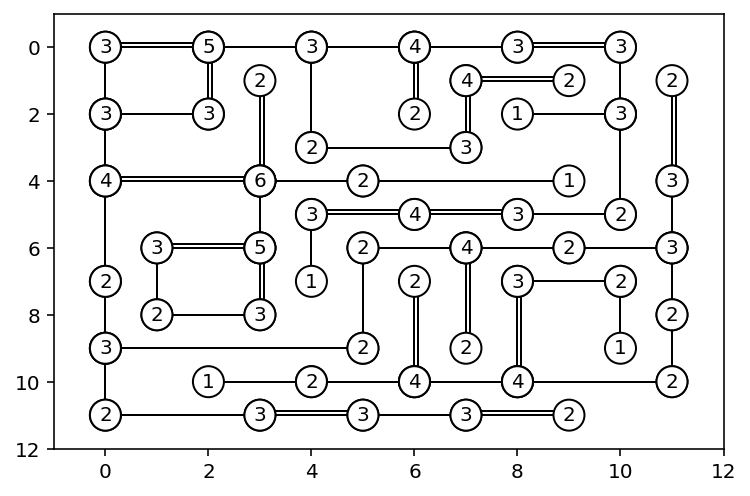

In [58]:
DEBUG = False
columns=['node', 'org_val', 'cur_val', '#lines', 'dir', 'new_val', 'reason']
def solve_hashi():
  global DEBUG, l_fix, h_fix, links, links_org, links, roads, nodes, df_sol
  l_fix = {}
  h_fix = hashi.copy()
  nodes = {}
  roads = {}
  df_sol = pd.DataFrame(columns=columns)

  make_nodes(h_fix)
  if DEBUG: p('make links')
  links, links_org = make_links()
  p('Before:')
  d(h_fix)

  DEBUG = True

  prepare_blocked_table()
  if DEBUG: p('After')
  if DEBUG: d(h_fix)
  score = sum_table(h_fix)
  p('Sum = ', score)
  if DEBUG:
    p('links:', links)
    p()
    p(list(links.keys()))
    p()
    p(l_fix)

  new_score = 0
  #DEBUG = True
  if DEBUG: d(h_fix)
  while new_score != score and score > 0:  
    while new_score != score and score > 0:  
      new_score = score
      prepare_blocked_table(1)
      score = sum_table(h_fix)
      p('Sum = ', score, new_score)
      #DEBUG = True
    if score == 54: DEBUG = True
    find_island()
    remove_single(round=-1)  # just in case find_island created a single
    #DEBUG = True
    prepare_blocked_table(1)
    score = sum_table(h_fix)
    if DEBUG: p()
    p('Sum2 = ', score)
    #DEBUG = True

  if score == 0:
    tree = make_tree()
    if len(tree.nodes) == 0:  # verify all connected
      d(df_sol)
      disp_to_file(df_sol, f_name + '_solution.png')
      plot_trip(trip())
    else:
      p(tree)
  else:
    d(h_fix)
    
solve_hashi()

# Check Hashi (not completed (in case not solved before plot())

In [34]:
#  sav_h = h_fix.copy()
#  sav_l = l_fix.copy()
#  sav_links = links.copy()
  
#  solution = trip()
#  tree = make_tree()
#  nz = tree.non_zero

In [63]:
pd.set_option('display.max_rows', None)
df_sol
disp_to_file(df_sol, f_name + '_solution.png')
pd.set_option('display.max_rows', 10)

In [67]:
dfi.convert(f_name + '_solution.png', use='browser')

UnicodeDecodeError: 'charmap' codec can't decode byte 0xdc in position 29: character maps to <undefined>